In [85]:
import math
import matplotlib.pyplot as plt
from random import seed
from random import randint

Test code for k-means for categorizing graph types

Idea:   
    -Use a version of k-means to categorize waveforms  
    -Use standard deviation to determine distance from "mean" graph

Cons: basically a 1 dimensional k-means algortithm on "error" from averages. Perhaps will have issues differentiating certain aspects of the graphs



In [166]:
x=range(0,4096)
ydata = []

#generates random y values only multiples of 6
def generateData(counts, seednum):
    seed(seednum)
    samples = []
    #generate downward step functions
    for i in range(int(round(counts/4))):
        sample = []
        height = 100
        #height variations
        yvars = []
        #horizontal variations
        xvars = []
        for j in range(16):
            yvars.append(randint(0,6))
            xvars.append(randint(0,80))
        
        for j in range(16):
            height = height-yvars[j]
            for k in range(256):
                if j != 0 and k < xvars[j]:
                    sample.append(height+yvars[j-1])
                else:
                    sample.append(height)        
        samples.append(sample)
    #generate downward step functions with spikes
    for i in range(int(round(counts/4))):
        sample = []
        height = 100
        #height variations
        yvars = []
        #horizontal variations
        xvars = []
        for j in range(16):
            yvars.append(randint(0,6))
            xvars.append(randint(0,80))
        
        for j in range(16):
            height = height-yvars[j]
            for k in range(256):
                if j != 0 and k < xvars[j]:
                    sample.append(height+yvars[j-1])
                else:
                    sample.append(height)        
        for j in range(4):
            spike = randint(5,4091)
            value = randint(sample[spike]-30, sample[spike]+30)
            #rate of change from before spike to spike
            preSlope = (value - sample[spike-3])/3
            #rate of change from spike to after spike
            postSlope = (sample[spike+3] - value)/3
            for k in range(3):
                sample[spike-k] = sample[spike-k] + k*preSlope
                sample[spike+k] = value + k*postSlope
            sample[spike] = value
        samples.append(sample)
        
    #generate varying step functions
#     for i in range(int(round(counts/4))):
#         sample = []
#         height = 70
#         #height variations
#         yvars = []
#         #horizontal variations
#         xvars = []
#         for j in range(16):
#             yvars.append(randint(-5,10))
#             xvars.append(randint(0,80))
        
#         for j in range(16):
#             height = height-yvars[j]
#             for k in range(256):
#                 if j != 0 and k < xvars[j]:
#                     sample.append(height+yvars[j-1])
#                 else:
#                     sample.append(height)        
#         samples.append(sample)
        
    #generate random moving functions
#     for i in range(int(round(counts/4))):
#         sample = []
#         previous = 50
#         for j in range(4096):
#             delta = randint(-1, 1)
#             previous = previous + delta
#             sample.append(previous)
#         samples.append(sample)
        
    #generate "hill" step functions
    for i in range(int(round(counts/4))):
        sample = []
        height = 20
        #height variations
        yvars = []
        #horizontal variations
        xvars = []
        for j in range(16):
            yvars.append(randint(4,10))
            xvars.append(randint(0,80))
        
        for j in range(16):
            if (j < 8):
                height = height+yvars[j]
            else:
                height = height-yvars[j]
            for k in range(256):
                if j != 0 and k < xvars[j]:
                    if (j < 8):
                        sample.append(height-yvars[j-1])
                    else:
                        sample.append(height+yvars[j-1])
                else:
                    sample.append(height)        
        samples.append(sample)
        
    #generate "hill" step functions with spikes
    for i in range(int(round(counts/4))):
        sample = []
        height = 20
        #height variations
        yvars = []
        #horizontal variations
        xvars = []
        for j in range(16):
            yvars.append(randint(4,10))
            xvars.append(randint(0,80))
        
        for j in range(16):
            if (j < 8):
                height = height+yvars[j]
            else:
                height = height-yvars[j]
            for k in range(256):
                if j != 0 and k < xvars[j]:
                    if (j < 8):
                        sample.append(height-yvars[j-1])
                    else:
                        sample.append(height+yvars[j-1])
                else:
                    sample.append(height)
        for j in range(4):
            spike = randint(5,4091)
            value = randint(sample[spike]-30, sample[spike]+30)
            #rate of change from before spike to spike
            preSlope = (value - sample[spike-3])/3
            #rate of change from spike to after spike
            postSlope = (sample[spike+3] - value)/3
            for k in range(3):
                sample[spike-k] = sample[spike-k] + k*preSlope
                sample[spike+k] = value + k*postSlope
            sample[spike] = value
        samples.append(sample)
    return samples


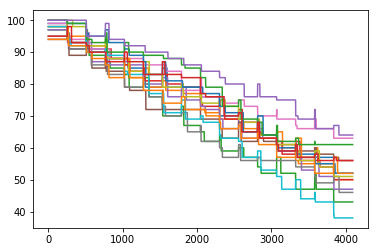

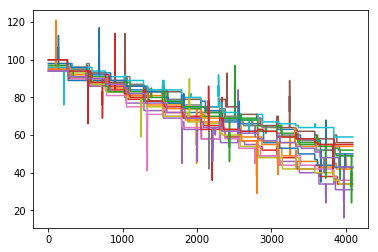

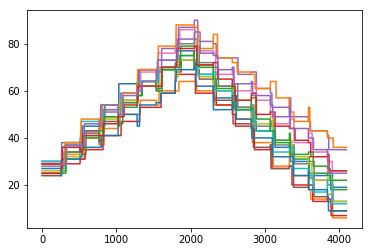

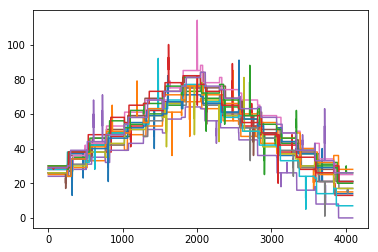

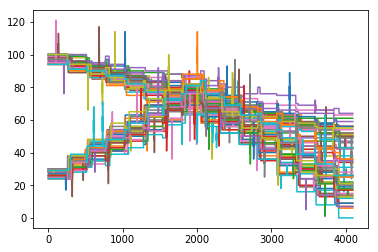

In [167]:
#Number of fake sample data
samples = 60

ydata = generateData(samples, 1)

for i in range(4):
    for j in range(15):
        plt.plot(x,ydata[i*15+j])
    plt.show()

for i in range(samples):
    plt.plot(x,ydata[i])
plt.show()

Various Utility functions

In [112]:
#Graph averaging function
def graphAverage(ys):
    avg = []
    for i in range(len(ys[0])):
        newy = 0
        for j in range(0, len(ys)):
            newy = newy + ys[j][i]
        newy = newy/len(ys)
        avg.append(newy)
    return avg

#"Distance" calculation using form of std error of regression
def distance(xs, average, comparitor):
    error = 0
    for i in xs:
        error = error + (comparitor[i]-average[i])**2
    return (error/(len(average)-2))**.5

#checks contents of lists under assumption no data sets are the same
def sameContents(xs, setA, setB, error):
    if len(setA) != len(setB):
        return False
    for i in range(len(setA)):
        if distance(xs, setA[i],setB[i]) > error:
            return False
    return True

In [113]:
#The main function, k-means
#Error is the acceptable difference in "distance" to consisder averages the same
def kmeans(xaxis, data, k, error):
    #initiating lists
    changed = 1
    iterations = 0
    averages = []
    newAverages = []
    sets = []
    for i in range(k):
        indice = int(round(i*(len(data)-1)/(k-1)-1))
        averages.append(data[indice])
        newAverages.append(data[indice])
        sets.append([])
        
    #Loops until the averages do not change or values are similar enough    
    while changed == 1:
        #Loop calculating which average a data set is closest to based of distance function
        for i in range(0, len(data)):
            closeAvg = 0;
            for j in range(k):
                if distance(xaxis, averages[closeAvg], data[i]) > distance(xaxis, averages[j], data[i]):
                    closeAvg = j
            sets[closeAvg].append(data[i])
        for i in range(k):
            newAverages[i] = graphAverage(sets[i])
        if sameContents(xaxis, averages, newAverages, error):
            break
        for i in range(k):
            averages[i] = newAverages[i]
            sets[i] = []
                                      
    return {"averages":averages, "sets":sets}

In [168]:
test = kmeans(x,ydata,2,0.00001)
print("done")

done


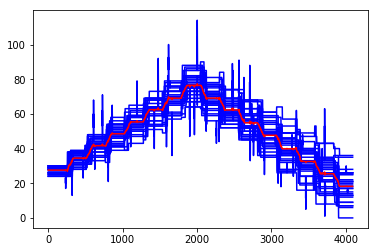

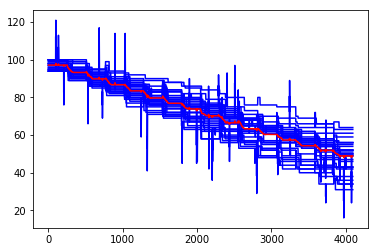

In [174]:
for i in range(0, len(test["averages"])):
    for j in range(0, len(test["sets"][i])):
        plt.plot(x, test["sets"][i][j], 'b')
    plt.plot(x,test["averages"][i], 'r')
    plt.show()